In [51]:
import sys
#import os
#os.environ['PATH'] += ':/Library/TeX/texbin'
sys.path.append('/Users/cg411/Documents/PhD/Phd/gwaves_phasetrans/CG/gwtools')

import matplotlib.pyplot as plt
import gwtools.gwtools as g 

import getdist as gd
from getdist.mcsamples import loadMCSamples
import numpy as np 
print(gd.__file__)
import getdist.plots as gdplt
import getdist as gd
import os
from cobaya.yaml import yaml_load_file

/Users/cg411/opt/anaconda3/lib/python3.7/site-packages/getdist/__init__.py


In [52]:
info = yaml_load_file('vw0_6alpha0_1rs0_01/ssmtools_vw0_6_al0_1_rs0_01.yaml')
folder, name = os.path.split(os.path.abspath(info["output"]))


In [53]:
gd_sample = loadMCSamples(os.path.abspath(info["output"]))
p= gd_sample.getParams()

In [54]:


minus, plus =  gd_sample.twoTailLimits(p.vw, 0.68)
print(minus,plus)
two_minus, two_plus = gd_sample.twoTailLimits(p.vw, 0.95)
print(two_minus,two_plus)


0.56411667 0.77190189
0.48612532 0.86835163


In [40]:
def filter_lower_bound(bound):
    gd_sample = loadMCSamples(os.path.abspath(info["output"]))
    p= gd_sample.getParams()
    filtered_vw = gd_sample.filter(p.vw<bound)
    p2= gd_sample.getParams()
    index_best_fit = np.argmax(p2.chi2)
    alpha = 10**(p2.log10_alpha[index_best_fit])
    rs = 10**(p2.log10_rs[index_best_fit])
    vw = p2.vw[index_best_fit]
    params = [vw,alpha,rs]
    print(params)
    return params

def filter_upper_bound(bound):
    gd_sample = loadMCSamples(os.path.abspath(info["output"]))
    p= gd_sample.getParams()
    filtered_vw = gd_sample.filter(p.vw>bound)
    p2= gd_sample.getParams()
    index_best_fit = np.argmin(p2.chi2)
    alpha = 10**(p2.log10_alpha[index_best_fit])
    rs = 10**(p2.log10_rs[index_best_fit])
    vw = p2.vw[index_best_fit]
    params = [vw,alpha,rs]
    print(params)
    return params
    
def plot_gw_SSM_paramlist(freqs, param_array ):
    """
    param-array given in the format 
    x =[[vw1,alpha1,rs1],[vw2,alpha2,rs1]]
    """
    g.get_plot_with_sensitivity(freqs,power_law=True, GB =False)
    colours = ['yellowgreen', 'seagreen','mediumvioletred','darkorchid', 'dodgerblue', 'mediumblue']
    sigmas = [r'$-2\sigma$', r'$-\sigma$','fiducial', r'$+\sigma$',r'$+2\sigma$']
    for n in range(len(param_array)):
        params = param_array[n]
        omgw = g.calc_omgw0(freqs,params[0],params[1],params[2])
        plt.loglog(freqs,omgw, color = colours[n], label= sigmas[n])
    plt.ylim(1e-15,1e-6)
    plt.legend()
        

In [47]:
vw = info["fiducial"]["vw"]
alpha = info["fiducial"]["alpha"]
rs = info["fiducial"]["rs"]

fiducial_params =[vw,alpha,rs] 

params_plus = filter_upper_bound(plus)
params_minus =filter_lower_bound(minus)
params_2plus = filter_upper_bound(two_plus)
params_2minus = filter_lower_bound(two_minus)

param_array = [params_2minus,params_minus,fiducial_params,params_plus,params_2plus]

[0.7728480999999999, 0.27891368268583866, 0.005388959255222381]
[0.53623212, 0.2570039924691596, 0.002155223927578843]
[0.8686756, 0.31481654617423377, 0.004126854905940549]
[0.43239303, 0.12038639234057459, 0.0038269192633921096]


In [15]:
gd_sample = loadMCSamples(os.path.abspath(info["output"]))
p= gd_sample.getParams()
filtered_vw = gd_sample.filter(p.vw>plus)
p2= gd_sample.getParams()
index_best_fit = np.argmin(p2.chi2)
alpha_plus = 10**(p2.log10_alpha[index_best_fit])
rs_plus = 10**(p2.log10_rs[index_best_fit])
vw_plus = p2.vw[index_best_fit]
params_plus = [vw_plus,alpha_plus,rs_plus]
print(params_plus)

[0.7728480999999999, 0.27891368268583866, 0.005388959255222381]


In [16]:
gd_sample = loadMCSamples(os.path.abspath(info["output"]))
p= gd_sample.getParams()
filtered_vw = gd_sample.filter(p.vw<minus)
p2= gd_sample.getParams()
index_best_fit = np.argmax(p2.chi2)

alpha_minus = 10**(p2.log10_alpha[index_best_fit])
rs_minus = 10**(p2.log10_rs[index_best_fit])
vw_minus = p2.vw[index_best_fit]
params_minus = [vw_minus,alpha_minus,rs_minus]
print(params_minus)

[0.53623212, 0.2570039924691596, 0.002155223927578843]


In [17]:
gd_sample = loadMCSamples(os.path.abspath(info["output"]))
p= gd_sample.getParams()
filtered_vw = gd_sample.filter(p.vw<two_minus)
p2= gd_sample.getParams()
index_best_fit = np.argmax(p2.chi2)

alpha_2minus = 10**(p2.log10_alpha[index_best_fit])
rs_2minus = 10**(p2.log10_rs[index_best_fit])
vw_2minus = p2.vw[index_best_fit]
params_2minus = [vw_2minus,alpha_2minus,rs_2minus]
print(params_2minus)

[0.43239303, 0.12038639234057459, 0.0038269192633921096]


In [18]:
gd_sample = loadMCSamples(os.path.abspath(info["output"]))
p= gd_sample.getParams()
filtered_vw = gd_sample.filter(p.vw>two_plus)
p2= gd_sample.getParams()
index_best_fit = np.argmin(p2.chi2)

alpha_2plus = 10**(p2.log10_alpha[index_best_fit])
rs_2plus = 10**(p2.log10_rs[index_best_fit])
vw_2plus = p2.vw[index_best_fit]
params_2plus = [vw_2plus,alpha_2plus,rs_2plus]
print(params_2plus)

[0.8686756, 0.31481654617423377, 0.004126854905940549]


0.6 0.1 0.01


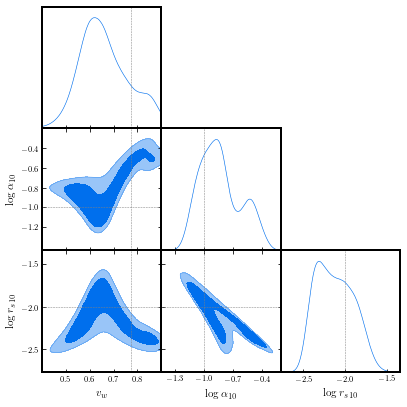

In [56]:
vw = info["fiducial"]["vw"]
alpha = info["fiducial"]["alpha"]
rs = info["fiducial"]["rs"]

fiducial_params =[vw,alpha,rs] 

print(vw,alpha,rs)
log10_alpha =np.log10(alpha) 
log10_rs = np.log10(rs)

fiducial = {"vw":plus,"log10_alpha":log10_alpha,"log10_rs":log10_rs}
gdplot = gdplt.getSubplotPlotter(rc_sizes= True,chain_dir=folder,analysis_settings={'ignore_rows': 0.3} )
gdplot.triangle_plot(name, ["vw", "log10_alpha","log10_rs"], filled=True,markers=fiducial )

In [ ]:
params_plus
params_minus
params_2plus
params_2minus

In [49]:

    
def plot_gw_SSM_paramlist(freqs, param_array ):
    """
    param-array given in the format 
    x =[[vw1,alpha1,rs1],[vw2,alpha2,rs1]]
    """
    g.get_plot_with_sensitivity(freqs,power_law=True, GB =False)
    colours = ['yellowgreen', 'seagreen','dodgerblue','mediumvioletred','darkorchid', 'mediumblue']
    sigmas = [r'$-2\sigma$', r'$-\sigma$','fiducial', r'$+\sigma$',r'$+2\sigma$']
    for n in range(len(param_array)):
        params = param_array[n]
        omgw = g.calc_omgw0(freqs,params[0],params[1],params[2])
        plt.loglog(freqs,omgw, color = colours[n], label= sigmas[n])
    plt.ylim(1e-15,1e-6)
    plt.legend()
        

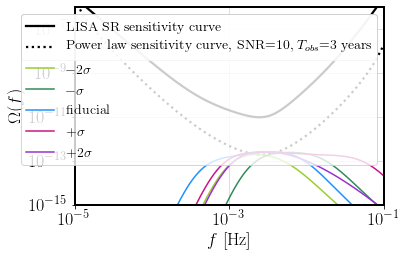

In [50]:
freqs = np.logspace(-5,-1,num=1000,base =10)
param_list = [params_2minus,params_minus,fiducial_params,params_plus,params_2plus]


plot_gw_SSM_paramlist(freqs,param_array)


In [21]:
    g.get_plot_with_sensitivity(freqs,power_law=True, GB =True)
    colours = ['yellowgreen', 'seagreen','mediumvioletred','darkorchid', 'dodgerblue', 'mediumblue']
    sigmas = [r'$-2\sigma$', r'$-\sigma$','fiducial', r'$+\sigma$',r'$+2\sigma$']

    
    def plot_gw_SSM_paramlist(freqs, params ):
    """
    param-array given in the format 
    x =[[vw1,alpha1,rs1],[vw2,alpha2,rs1]]
    """

    omgw = g.calc_omgw0(freqs,params[0],params[1],params[2])
    plt.loglog(freqs,omgw)
    plt.ylim(1e-15,1e-6)
    plt.legend()
    
p= gd_sample.getParams()
#type()
print(len(p.vw))

print(len(np.where(p.vw>0.5)[0]))
filtered_vw = gd_sample.filter(p.vw>0.5)


201958
195031


In [22]:
p2 = gd_sample.getParams()
names = gd_sample.getParamNames()
print(len(p2.vw))
print(p2.__dir__())

195031
['log10_alpha', 'log10_rs', 'vw', 'chi2', 'chi2__lisa_likelihood', '__module__', '__doc__', '__dict__', '__weakref__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__init__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']


In [23]:
max(p2.vw)




0.89998524

In [24]:
min(p.vw)

0.40004263

In [25]:
filtered_vw2 = gd_sample.filter(p2.vw<0.51)

In [26]:
p3 = gd_sample.getParams()

In [27]:
max(p3.vw)

0.50999456

In [10]:
type(filtered_vw2) # doesn't return an object just does the operation 

NoneType

In [31]:
like = gd_sample.getLikeStats()
type(like)
like.names[2].bestfit_sample
print(np.argmin(p3.chi2))
index_best_fit = np.argmin(p3.chi2)
print(p3.log10_alpha[index_best_fit])
print(p3.log10_rs[index_best_fit])
print(p3.vw[index_best_fit])

2084
-0.83137312
-2.361641
0.50996845


In [17]:
chains.getMeans()

array([-0.83316506, -2.11172663,  0.66487043,  1.5040774 ,  1.5040774 ,
        2.64989553,  2.64989553])

In [43]:
chain = gd.chains.Chains(root=None,names = ["vw", "log10_alpha","log10_rs"])

chains = chain.loadChains( files_or_samples:'vw0_5alpha0_05rs0_01/chains/chain.1.txt''vw0_5alpha0_05rs0_01/chains/chain.2.txt')
#chain.filter(where)


SyntaxError: invalid syntax (<ipython-input-43-e5484c53d5d6>, line 3)

In [ ]:


folder, name = os.path.split(os.path.abspath(info["output"]))
vw = info["fiducial"]["vw"]
alpha = info["fiducial"]["alpha"]
rs = info["fiducial"]["rs"]

save_string = 'plots/vw_{}alpha{}rs{}'.format(vw,alpha,rs).replace(".","_") +'.png'

log10_alpha =np.log10(alpha) 
log10_rs = np.log10(rs)

fiducial = {"vw":vw,"log10_alpha":log10_alpha,"log10_rs":log10_rs}
gdplot = gdplt.getSubplotPlotter(rc_sizes= True,chain_dir=folder,analysis_settings={'ignore_rows': 0.3} )
gdplot.triangle_plot(name, ["vw", "log10_alpha","log10_rs"], filled=True,markers=fiducial )

plt.savefig(save_string)

In [ ]:
class getdist.chains.WeightedSamples(filename=None, ignore_rows=0, samples=None, weights=None, loglikes=None, name_tag=None, label=None, files_are_chains=True, min_weight_ratio=1e-30

In [ ]:
confidence = chains.confidence(2,0.025)
print(confidence)
vw = chains.getName()
print(vw)
minus, plus = chains.twoTailLimits(2, 0.68)
two_minus, two_plus = chains.twoTailLimits(2,0.95)
print(minus,plus)
print(two_minus, two_plus)



In [ ]:
filtered_vw= chains.filter(2)
print(filtered_vw)

In [ ]:
print(filtered_vw)
print(len(gd_sample.filter(np.where(p.vw>0.5))))